In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

Reading in the data: we use sample variance of half of the fifty random samples 

In [2]:
df = pd.read_csv('../../Data\ICTO_Datasets\ICTO_Giving_2008-2014.csv').sample(frac=0.5)

Explore the data: look at things such as the size of the dataset, the statistics on the data, data types of each column, and the data itself 

In [3]:
df.head()

,DonorAccountId,MemberAccountId,FundId,FundGroup,GiftDate,GiftAmt
491645,4022519347847175768,4.023344e+18,123472379587619116,Member,2012-02-21,150.0
347648,4023350703594479168,4.022467e+18,123472379620976419,Member,2012-01-10,25.0
473973,4018528287705865812,4.022464e+18,123472383932983842,Member,2012-02-20,162.0
3002837,4023336778505199184,4.023372e+18,123471288598556460,Member,2014-04-10,25.0
2066338,4023336468529356368,4.023349e+18,123472375158761765,Member,2013-06-20,30.0


In [4]:
df.shape

(1919323, 6)

In [5]:
df.describe()

,DonorAccountId,MemberAccountId,FundId,GiftAmt
count,1.919323e+06,1.774952e+06,1.919323e+06,1.919323e+06
mean,4.023807e+18,4.023667e+18,1.234716e+17,1.954044e+02
std,9.197749e+16,5.005317e+16,2.045696e+12,2.228010e+03
min,3.499237e+18,4.018522e+18,1.234647e+17,1.000000e-02
25%,4.019369e+18,4.022465e+18,1.234724e+17,3.000000e+01
50%,4.022464e+18,4.023342e+18,1.234724e+17,5.000000e+01
75%,4.023355e+18,4.023348e+18,1.234724e+17,1.400000e+02
max,8.924352e+18,8.423685e+18,1.234735e+17,1.000000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1919323 entries, 491645 to 854210
Data columns (total 6 columns):
DonorAccountId     int64
MemberAccountId    float64
FundId             int64
FundGroup          object
GiftDate           object
GiftAmt            float64
dtypes: float64(2), int64(2), object(2)
memory usage: 102.5+ MB


In [7]:
df.columns

Index(['DonorAccountId', 'MemberAccountId', 'FundId', 'FundGroup', 'GiftDate',
       'GiftAmt'],
      dtype='object')

First step in data cleaning: checking for null values and dropping them

In [8]:
pd.isnull(df).head()

,DonorAccountId,MemberAccountId,FundId,FundGroup,GiftDate,GiftAmt
491645,False,False,False,False,False,False
347648,False,False,False,False,False,False
473973,False,False,False,False,False,False
3002837,False,False,False,False,False,False
2066338,False,False,False,False,False,False


In [9]:
df.isnull().sum()

DonorAccountId          0
MemberAccountId    144371
FundId                  0
FundGroup            3085
GiftDate                0
GiftAmt                 0
dtype: int64

Looking at the data there are many null values, we will drop them with this command

In [10]:
df.dropna(inplace = True)

In [11]:
df.shape

(1774952, 6)

In [12]:
print("Null Values")
print(df.isnull().sum()) # checking again for null values
print()
print("Na Values")
print(df.isna().sum()) # also checking for na values

Null Values
DonorAccountId     0
MemberAccountId    0
FundId             0
FundGroup          0
GiftDate           0
GiftAmt            0
dtype: int64

Na Values
DonorAccountId     0
MemberAccountId    0
FundId             0
FundGroup          0
GiftDate           0
GiftAmt            0
dtype: int64


Second Step: check for outliers in the data
-Outliers are great for training an ML model but if they are to far away from 
the median or mean of the data it can throw of our training process

In [13]:
df.head(10)

,DonorAccountId,MemberAccountId,FundId,FundGroup,GiftDate,GiftAmt
491645,4022519347847175768,4.023344e+18,123472379587619116,Member,2012-02-21,150.0
347648,4023350703594479168,4.022467e+18,123472379620976419,Member,2012-01-10,25.0
473973,4018528287705865812,4.022464e+18,123472383932983842,Member,2012-02-20,162.0
3002837,4023336778505199184,4.023372e+18,123471288598556460,Member,2014-04-10,25.0
2066338,4023336468529356368,4.023349e+18,123472375158761765,Member,2013-06-20,30.0
1528565,4019419906390957607,4.022464e+18,123471297205726246,Member,2013-01-08,100.0
2810968,4023334051268075096,4.023402e+18,123472353767679522,Member,2014-02-10,30.0
3429416,4022455705105669700,4.022465e+18,123472383748630566,Member,2014-08-27,20.0
3255567,4019415444221926951,4.019421e+18,123472383882913314,Member,2014-07-03,150.0
2839662,4019367558725574228,4.023397e+18,123472375325945633,Member,2014-02-20,25.0


In [14]:
# print("GiftAmt")
print(df['GiftAmt'].value_counts().head())
print(df['GiftAmt'].value_counts().tail())
# df['GiftAmt'].value_counts()

50.0     316133
100.0    233605
25.0     186397
20.0      91870
30.0      87217
Name: GiftAmt, dtype: int64
377.52     1
38.85      1
1417.50    1
172.42     1
339.34     1
Name: GiftAmt, dtype: int64


In [15]:
# print("GiftDate")
print(df['GiftDate'].value_counts().head())
print(df['GiftDate'].value_counts().tail())
# df['GiftDate'].value_counts()

2012-01-10    12461
2014-07-10    11536
2013-06-10    10891
2014-02-10    10848
2012-07-10    10653
Name: GiftDate, dtype: int64
2009-01-23    2
2009-01-08    2
2008-12-27    1
2009-01-12    1
2009-01-13    1
Name: GiftDate, dtype: int64


In [16]:
# Get the 98th and 2nd percentile as the limits of our outliers
upper_limit = np.percentile(df.GiftAmt.values, 98) 
lower_limit = np.percentile(df.GiftAmt.values, 2) 
# Filter the outliers from the dataframe

df['GiftAmt'].loc[df['GiftAmt']>upper_limit] = upper_limit
df['GiftAmt'].loc[df['GiftAmt']<lower_limit] = lower_limit

C:\Users\craig\Desktop\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


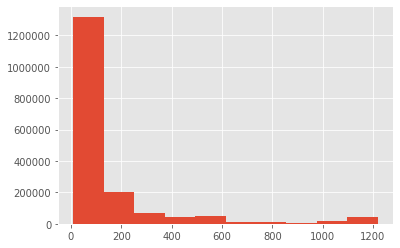

In [17]:
plt.hist(df['GiftAmt'], bins=10, histtype='bar')
# plt.hist(df['GiftDate'],bins=10, histtype='bar')
plt.show()

In [18]:
df['GiftAmt'].mean()

151.05581673194948

In [19]:
df['GiftAmt'].median()

55.0

Create a scatter chart with a line going through the middle that is the mean 

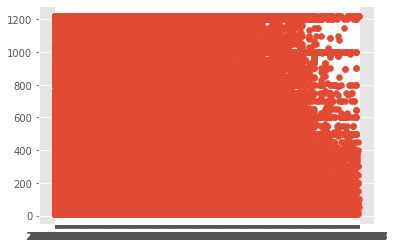

In [20]:
plt.scatter(df['GiftDate'], df['GiftAmt'])
plt.show()

In [21]:
Dates = pd.Series(df['GiftDate'].sample(frac=0.5))
Amount = pd.Series(df['GiftAmt'].sample(frac=0.5))
plt.plot(Dates, Amount, color='red', marker='o')
plt.show()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

In [22]:
# plt.bar(df['GiftAmt'], df['GiftDate'])
# plt.show()

Third Step: check for duplicates and bad values in the data

In [23]:
sum(df.duplicated()) # duplicates found

10909

In [24]:
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

In [25]:
df.columns

Index(['DonorAccountId', 'MemberAccountId', 'FundId', 'FundGroup', 'GiftDate',
       'GiftAmt'],
      dtype='object')

In [26]:
df['FundGroup'].value_counts().head()

Member        1760298
Paid Staff       3745
Name: FundGroup, dtype: int64

In [27]:
df['GiftDate'].value_counts().head()

2012-01-10    12429
2014-07-10    11502
2013-06-10    10859
2014-02-10    10799
2012-07-10    10615
Name: GiftDate, dtype: int64

In [28]:
df['GiftAmt'].value_counts().head()

50.0     316133
100.0    233605
25.0     186397
20.0      91870
30.0      87217
Name: GiftAmt, dtype: int64

In [29]:
# Convert the data to string instead of object for data analysis
df['FundGroup'] = df['FundGroup'].astype('str')
df['GiftDate'] = df['GiftDate'].astype('str')

In [30]:
# df = df.drop(['DonorAccountId', 'MemberAccountId'], axis=1)
df.head()

,DonorAccountId,MemberAccountId,FundId,FundGroup,GiftDate,GiftAmt
491645,4022519347847175768,4.023344e+18,123472379587619116,Member,2012-02-21,150.0
347648,4023350703594479168,4.022467e+18,123472379620976419,Member,2012-01-10,25.0
473973,4018528287705865812,4.022464e+18,123472383932983842,Member,2012-02-20,162.0
3002837,4023336778505199184,4.023372e+18,123471288598556460,Member,2014-04-10,25.0
2066338,4023336468529356368,4.023349e+18,123472375158761765,Member,2013-06-20,30.0


Fourth Step: Drop Irrelevant Features

In [31]:
df.drop(['DonorAccountId', 'MemberAccountId', 'FundId'], axis=1, inplace=True)

In [32]:
df.head()

,FundGroup,GiftDate,GiftAmt
491645,Member,2012-02-21,150.0
347648,Member,2012-01-10,25.0
473973,Member,2012-02-20,162.0
3002837,Member,2014-04-10,25.0
2066338,Member,2013-06-20,30.0


Checking from the value counts the data seems to be standardized

Creating an Index column for all of the new data from 0 to last row

In [33]:
# df['Index'] = df.iloc[0]

In [34]:
# df.set_index(df['Index']).head()

In [35]:
# df['Index'] = pd.Series(range(0,df.shape[0]))
# df['Index'] = pd.Series(range(0, len(df['FundId'])))
# df['Index'].head()

In [36]:
# print(df.shape[0])

In [37]:
# df.set_index(df['Index']).head()

In [38]:
# df.head()

Reading out the cleaned dataset into a new csv file

In [40]:
df.to_csv('../../Data/ICTO_Datasets/cleaned_ICTO_Giving_2004-2014.csv')